In [1]:
# Import Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import Dataset
df=pd.read_csv("D:/DATA SCIENCE/Projects Completed/Rapidious company/Epi-Recipes Data.csv")

In [5]:
df.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df.shape

(20052, 680)

In [9]:
#Check the Structure and Data Types:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 104.0+ MB


In [11]:
#Basic Statistics
df.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,...,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.000299,0.000050,0.000848,0.001346,0.000349,...,0.001247,0.026332,0.000050,0.000299,0.014861,0.000150,0.000349,0.001396,0.000948,0.022741
std,1.340829,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,0.017296,0.007062,0.029105,0.036671,0.018681,...,0.035288,0.160123,0.007062,0.017296,0.121001,0.012231,0.018681,0.037343,0.030768,0.149080
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,1.980000e+02,3.000000,7.000000e+00,8.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,3.310000e+02,8.000000,1.700000e+01,2.940000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,5.860000e+02,27.000000,3.300000e+01,7.110000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
# Create new column (ingredient List )
df_new=df.iloc[:, [0] + list(range(1, len(df.columns)))]
df_new['ingredients_list']= df_new.apply(lambda row: ','.join(row.index[row==1]), axis=1)
df_new.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,ingredients_list
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"apple,bean,cookie,fruit,kid-friendly,lentil,le..."
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"bake,bastille day,bon appétit,chill,dried frui..."
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"dairy,fennel,gourmet,new york,potato,soup/stew..."
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"bon appétit,dairy free,dinner,fish,healthy,hig..."
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"bake,bon appétit,california,cheese,dairy,fall,..."


In [15]:
df_new.shape

(20052, 681)

In [17]:
# Check for duplicate rows
duplicates = df_new.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Drop Duplicates
df_new.drop_duplicates(inplace=True)

# Confirm removal
print(f"Number of duplicate rows after removal: {df_new.duplicated().sum()}")

Number of duplicate rows: 1801
Number of duplicate rows after removal: 0


In [19]:
# Check for missing values
missing_values = df_new.isnull().sum()
print(missing_values)
missing_percentage = (missing_values / len(df_new)) * 100
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})


print(missing_info[missing_info['Missing Values'] > 0])

title                  0
rating                 0
calories            3749
protein             3781
fat                 3801
                    ... 
leftovers              0
snack                  0
snack week             0
turkey                 0
ingredients_list       0
Length: 681, dtype: int64
          Missing Values  Percentage
calories            3749   20.541340
protein             3781   20.716673
fat                 3801   20.826256
sodium              3750   20.546819


In [21]:
# Filling nutritional data with median values
nutrition_columns = ['calories', 'protein', 'fat', 'sodium']
for col in nutrition_columns:
    df_new[col].fillna(df_new[col].median(), inplace=True)

# Check missing values again
print(df_new.isnull().sum())

title               0
rating              0
calories            0
protein             0
fat                 0
                   ..
leftovers           0
snack               0
snack week          0
turkey              0
ingredients_list    0
Length: 681, dtype: int64


C:\Users\218882\AppData\Local\Temp\ipykernel_17040\3855439026.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_new[col].fillna(df_new[col].median(), inplace=True)


In [23]:
# Example: Check for negative values in numeric fields
negative_values = df_new[(df_new['calories'] < 0) | (df_new['protein'] < 0) | 
                (df_new['fat'] < 0) | (df_new['sodium'] < 0)]

print(negative_values)

Empty DataFrame
Columns: [title, rating, calories, protein, fat, sodium, #cakeweek, #wasteless, 22-minute meals, 3-ingredient recipes, 30 days of groceries, advance prep required, alabama, alaska, alcoholic, almond, amaretto, anchovy, anise, anniversary, anthony bourdain, aperitif, appetizer, apple, apple juice, apricot, arizona, artichoke, arugula, asian pear, asparagus, aspen, atlanta, australia, avocado, back to school, backyard bbq, bacon, bake, banana, barley, basil, bass, bastille day, bean, beef, beef rib, beef shank, beef tenderloin, beer, beet, bell pepper, berry, beverly hills, birthday, biscuit, bitters, blackberry, blender, blue cheese, blueberry, boil, bok choy, bon appétit, bon app��tit, boston, bourbon, braise, bran, brandy, bread, breadcrumbs, breakfast, brie, brine, brisket, broccoli, broccoli rabe, broil, brooklyn, brown rice, brownie, brunch, brussel sprout, buffalo, buffet, bulgaria, bulgur, burrito, butter, buttermilk, butternut squash, butterscotch/caramel, cabbag

In [25]:
# Check for incorrect ratings
df_new = df_new[(df_new['rating'] >= 0) & (df_new['rating'] <= 5)]

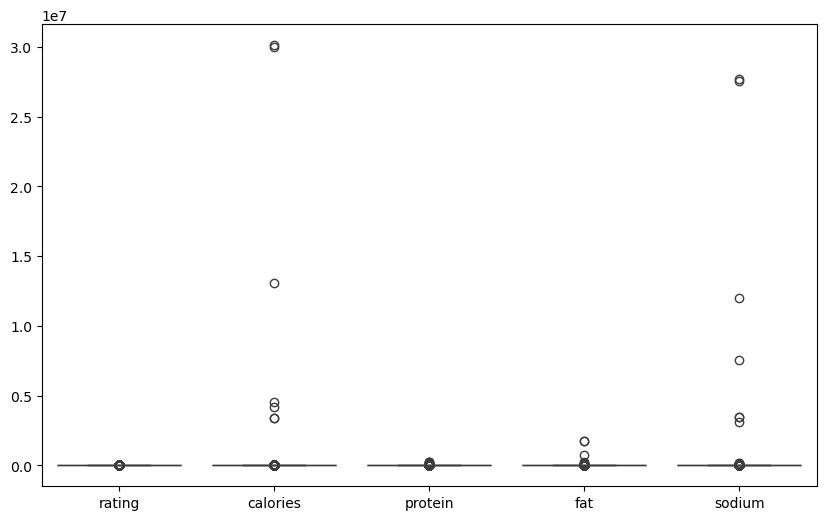

In [27]:
# Using Boxplot Identify Outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_new[['rating', 'calories', 'protein','fat', 'sodium']])
plt.show()

In [29]:
#Identify Outliers

# Using IQR method
Q1 = df[['calories']].quantile(0.25)
Q3 = df[['calories']].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (df_new[['calories']] < (Q1 - 1.5 * IQR)) | (df_new[['calories']] > (Q3 + 1.5 * IQR))
outliers = df_new[outlier_condition.any(axis=1)]

In [31]:
#Handling Outliers
#Capping:
df_new['calories'] = df_new['calories'].clip(lower=Q1['calories'] - 1.5 * IQR['calories'],
                                                                 upper=Q3['calories'] + 1.5 * IQR['calories'])


In [33]:
# Standardize title names
def standardize_title_col(title):
    return title.lower().strip()

# Assuming 'ingredients' is the column with ingredient names
df_new['title'] = df_new['title'].apply(standardize_title_col)


In [35]:
# Check data types
print(df_new.dtypes)

title                object
rating              float64
calories            float64
protein             float64
fat                 float64
                     ...   
leftovers           float64
snack               float64
snack week          float64
turkey              float64
ingredients_list     object
Length: 681, dtype: object


In [37]:
df_new['rating'] = df_new['rating'].astype(float)
df_new['rating'] = df_new['rating'].round(1)


# Convert data types 
df_new['calories'] = df_new['calories'].astype(int)
df_new['protein'] = df_new['protein'].astype(int)
df_new['fat'] = df_new['fat'].astype(int)
df_new['sodium'] = df_new['sodium'].astype(int)


print(df_new.dtypes)

title                object
rating              float64
calories              int32
protein               int32
fat                   int32
                     ...   
leftovers           float64
snack               float64
snack week          float64
turkey              float64
ingredients_list     object
Length: 681, dtype: object


In [39]:
df_new.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,ingredients_list
0,"lentil, apple, and turkey wrap",2.5,426,30,7,559,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"apple,bean,cookie,fruit,kid-friendly,lentil,le..."
1,boudin blanc terrine with red onion confit,4.4,403,18,23,1439,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"bake,bastille day,bon appétit,chill,dried frui..."
2,potato and fennel soup hodge,3.8,165,6,7,165,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"dairy,fennel,gourmet,new york,potato,soup/stew..."
3,mahi-mahi in tomato olive sauce,5.0,345,9,18,304,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"bon appétit,dairy free,dinner,fish,healthy,hig..."
4,spinach noodle casserole,3.1,547,20,32,452,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"bake,bon appétit,california,cheese,dairy,fall,..."


## Data Cleaning Process Documentation ##

## 1. Data Cleaning Steps ##

   
__Step 1: Initial Exploration__

__Actions:__ Loaded the dataset and performed an initial examination to understand its structure and data types.

__Outcome:__ Identified potential columns for cleaning and analyzed the overall distribution of data.



__Step 2: Identify Missing Data__

__Challenges:__ The dataset contained missing values in several columns. This posed a challenge as missing data could skew the analysis and lead to incorrect conclusions.
A significant portion of missing data required careful handling to avoid bias in analysis.

__Actions:__ Checked for missing values across all columns using .isnull().sum().

__Outcome:__ Found columns with a significant number of missing values.



__Step 3: Handle Missing Data__

__Decisions Made:__ For numerical columns, used the mean to impute missing values.
For categorical columns, used the mode for imputation for balancing between data integrity and preserving the dataset size.

__Assumptions:__ Mean and mode imputation would not introduce significant bias into the analysis outcomes.



__Step 4: Identify and Handle Duplicates__

__Actions:__ Checked for duplicate rows using .duplicated().

__Challenges:__ Duplicate entries can distort analysis results, leading to inflated counts or averages.
I identified duplicate rows in the dataset and decided to remove them to maintain the integrity of the dataset. This involved dropping any exact duplicate entries.

__Outcome:__ Removed any duplicate entries to ensure each recipe was unique.

__Assumptions:__ It was assumed that any duplicate entries did not contain valuable unique information and that their removal would not impact the dataset's usability.



__Step 5: Identify Incorrect Data Entries__

__Actions:__ Checked for invalid ratings (e.g., ratings outside the 0-5 range).

__Challenges:__ Some categorical data exhibited inconsistencies, such as variations in casing and spelling (e.g., "Italian" vs. "italian").

__Decisions Made:__ I standardized categorical entries by converting them to lowercase and stripping any leading or trailing whitespace. This approach ensured that categories were uniformly represented, facilitating more accurate analysis.

__Outcome:__ Filtered out any records with ratings outside the acceptable range.

__Assumptions:__ The assumption was made that variations in casing and whitespace did not represent distinct categories but rather formatting inconsistencies.



__Step 6: Handle Outliers__

__Challenges:__ Deciding on the appropriate method to use for outlier detection required consideration of the data distribution. Using both methods provided a more robust approach.

__Decisions Made:__ Used the Interquartile Range (IQR) method to identify and remove outliers for numerical columns.

__Assumptions:__ Assumed that the IQR method would adequately capture outliers without removing too many valid data points. 
The assumptions regarding outlier detection methods would be effective in maintaining a balance between data quality and quantity.



__Step 7: Ensure Data Consistency__

__Actions:__ Standardized recipes names to avoid duplication (e.g., converting to lower case).

__Outcome:__ Improved the consistency of the dataset, making it easier to analyze data.



__Step 8: Verifying Data Consistency__

__Challenges:__ After cleaning, it was necessary to verify that the data types were appropriate for analysis. This required checking that numeric columns were indeed of a numeric type and categorical columns were consistent.

__Decisions Made:__ I reviewed the data types after cleaning to ensure that all columns were correctly formatted. Any necessary adjustments were made to ensure data consistency.

__Assumptions:__ It was assumed that the original data types were accurate and only required minor adjustments to achieve consistency after cleaning.


In [42]:
df_new.columns

Index(['title', 'rating', 'calories', 'protein', 'fat', 'sodium', '#cakeweek',
       '#wasteless', '22-minute meals', '3-ingredient recipes',
       ...
       'yogurt', 'yonkers', 'yuca', 'zucchini', 'cookbooks', 'leftovers',
       'snack', 'snack week', 'turkey', 'ingredients_list'],
      dtype='object', length=681)

In [44]:
df_new.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,18251.000000,18251.000000,18251.000000,1.825100e+04,1.825100e+04,18251.000000,18251.000000,18251.000000,18251.000000,18251.000000,...,18251.000000,18251.000000,18251.000000,18251.000000,18251.00000,18251.000000,18251.000000,18251.000000,18251.000000,18251.000000
mean,3.735050,419.645280,74.985864,2.914618e+02,5.285578e+03,0.000329,0.000055,0.000931,0.001479,0.000384,...,0.001370,0.027067,0.000055,0.000329,0.01567,0.000164,0.000384,0.001479,0.000986,0.020985
std,1.340822,281.060775,3127.068944,1.900439e+04,3.105751e+05,0.018129,0.007402,0.030506,0.038435,0.019581,...,0.036986,0.162283,0.007402,0.018129,0.12420,0.012820,0.019581,0.038435,0.031390,0.143338
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.800000,238.000000,4.000000,1.100000e+01,1.320000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.400000,345.000000,9.000000,1.800000e+01,3.040000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.400000,516.500000,21.000000,2.800000e+01,5.890000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,1168.000000,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
# Checking the distribution of ratings
rating_counts = df_new['rating'].value_counts().sort_index()
print(rating_counts)

rating
0.0    1659
1.2     145
1.9     108
2.5     482
3.1    1356
3.8    4756
4.4    7362
5.0    2383
Name: count, dtype: int64


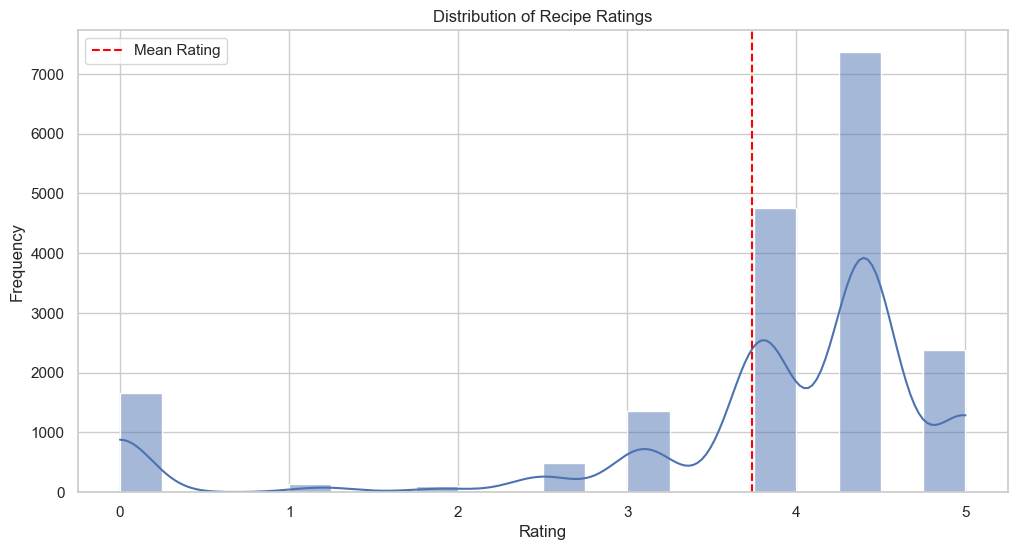

In [48]:
# Exploratory Data Analysis (EDA)
# Set the style of seaborn
sns.set(style='whitegrid')

# Plotting the histogram
plt.figure(figsize=(12, 6))
sns.histplot(df_new['rating'], bins=20, kde=True)
plt.title('Distribution of Recipe Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.axvline(df_new['rating'].mean(), color='red', linestyle='--', label='Mean Rating')
plt.legend()
plt.show()

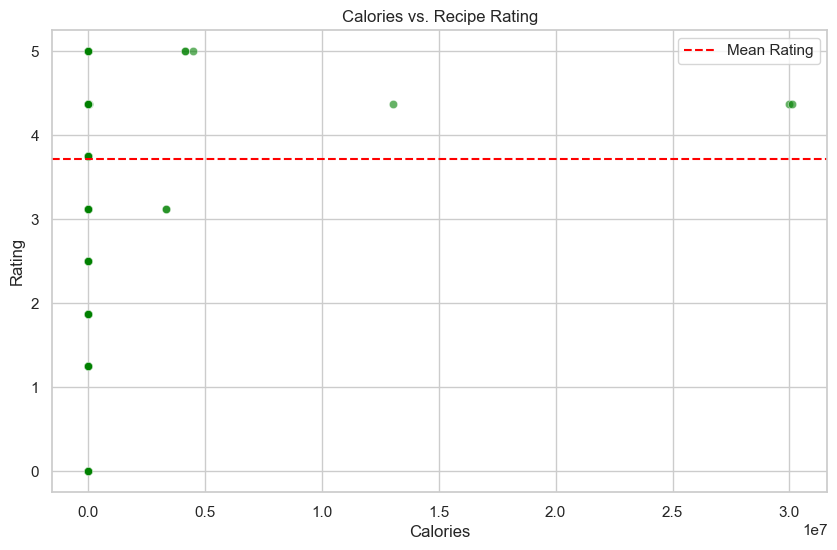

In [50]:
# Scatter plot of Calories vs. Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='calories', y='rating', alpha=0.6, color='green')
plt.title('Calories vs. Recipe Rating')
plt.xlabel('Calories')
plt.ylabel('Rating')
plt.axhline(df['rating'].mean(), color='red', linestyle='--', label='Mean Rating')
plt.legend()
plt.show()

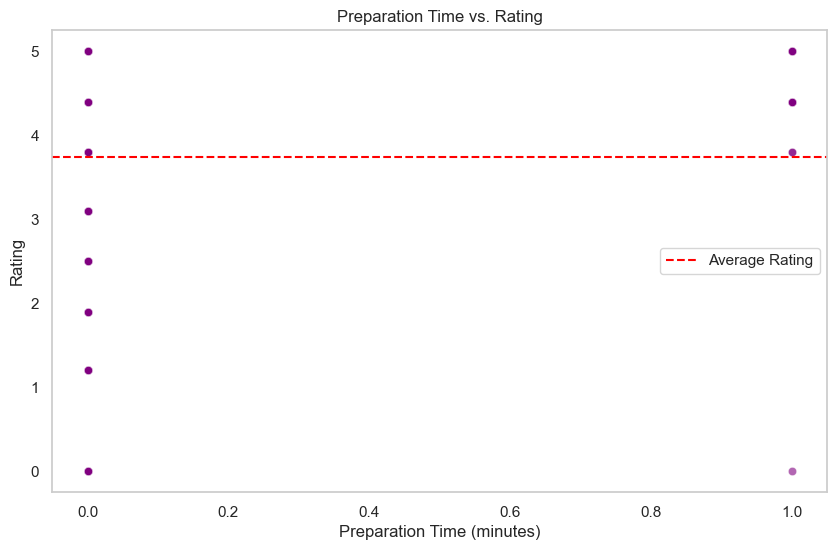

In [52]:
# Scatter Plot for Preparation Time Vs Rating 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_new, x='22-minute meals', y='rating', alpha=0.6, color='purple')
plt.title('Preparation Time vs. Rating')
plt.xlabel('Preparation Time (minutes)')
plt.ylabel('Rating')
plt.axhline(y=df_new['rating'].mean(), color='red', linestyle='--', label='Average Rating')
plt.legend()
plt.grid()
plt.show()

C:\Users\218882\AppData\Local\Temp\ipykernel_17040\4025149187.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nutritional_means.index, y=nutritional_means.values, palette='viridis')


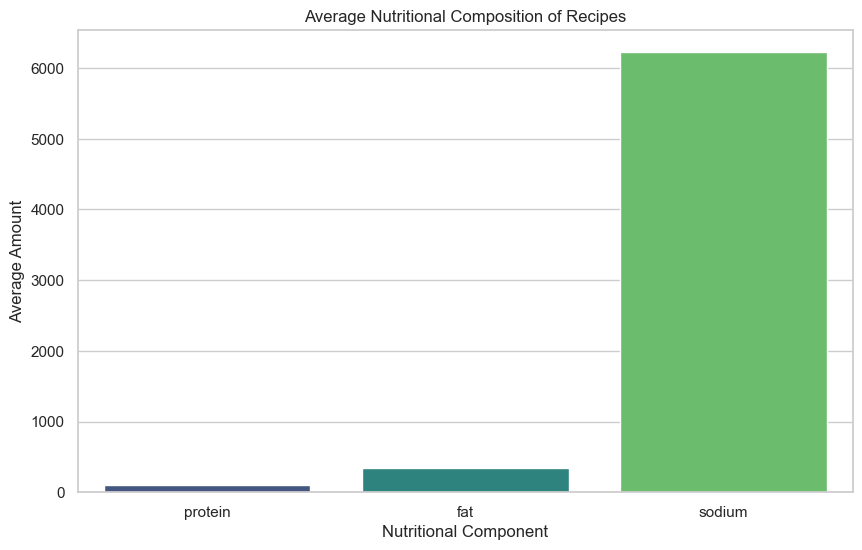

In [54]:
#Nutritional Composition of Recipes

# Bar chart of average nutritional content
nutritional_means = df[['protein', 'fat', 'sodium']].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=nutritional_means.index, y=nutritional_means.values, palette='viridis')
plt.title('Average Nutritional Composition of Recipes')
plt.xlabel('Nutritional Component')
plt.ylabel('Average Amount')
plt.show()

## The key insights derived from the exploratory data analysis of the EpiRecipes dataset, along with potential business questions and their answers. ## 

### Insight 1: Distribution of Ratings ###

__Observation:__ The histogram shows that most recipes are rated around the mean, with a slight skew towards higher ratings. A bell-shaped distribution indicates user satisfaction, but there are still some recipes that receive very low ratings.

__1) Business Question: How can we improve the lower-rated recipes to enhance overall customer satisfaction?__

__Answer:__ Analyze the ingredients and preparation methods of lower-rated recipes to identify commonalities. Consider providing additional cooking tips, adjusting ingredient ratios, or enhancing the flavor profiles based on user feedback.


### Insight 2: Relationship Between Calories and Rating ###

__Observation:__ The scatter plot suggests a moderate negative correlation between calorie count and rating, where higher calorie recipes tend to receive lower ratings. However, there are still high-calorie recipes with good ratings, indicating variability in user preferences.

__2) Business Question: Should we consider offering more low-calorie recipes to attract health-conscious consumers?__

__Answer:__ Create a marketing strategy focusing on low-calorie recipes that are highly rated. This can help capture the interest of health-conscious consumers, potentially increasing the customer base. Additionally, introducing lighter versions of popular high-calorie recipes could enhance user engagement.



### Insight 3: Nutritional Composition of Recipes ###

__Observation:__ The bar chart highlights that recipes tend to have higher average fat and sodium content compared to protein. This suggests that many recipes might be less suitable for health-conscious consumers or those with dietary restrictions.

__3) Business Question:__ How can we reformulate our recipes to cater to health-conscious customers?

__Answer:__ Develop a line of recipes that focus on lower fat and sodium content while maintaining flavor. This could include using alternative ingredients or cooking methods that reduce fat and sodium. Additionally, offering nutritional information prominently can attract customers who are looking for healthier options.

 


### Insight 4: Common Ingredients in Highly Rated Recipes ###

__Observation:__ By analyzing the ingredients list of highly rated recipes, we can identify the most frequently used ingredients among top-rated recipes.

__4) Business Question:__ What are the most common ingredients in highly rated recipes, and how can we leverage this information?

__Answer:__ Ingredient Focus: Highlight these common ingredients in new recipe development or in promotional content. For example, if ingredients like garlic, olive oil, or chicken appear frequently in highly rated recipes, consider creating themed collections or guides focused on these ingredients.

__User Experience:__ Create interactive features on the platform, such as "Top Ingredients of the Month," where users can discover new recipes centered around popular ingredients.


### Insight 5: Correlation Between Preparation Time and Recipe Ratings ###

__Observation:__ Analyzing the relationship between preparation time and recipe ratings may reveal patterns indicating whether quicker recipes are preferred or if users are willing to invest time for better-rated recipes.

__5) Business Question:__ Is there a correlation between preparation time and recipe ratings that can guide content creation?

__Answer:__ Recipe Categorization: If shorter preparation times correlate with higher ratings, emphasize quick and easy recipes in the marketing strategy. Consider creating categories like “30-Minute Meals” or “Quick Weeknight Dinners.”

__User Experience:__ Implement filtering options on the platform allowing users to sort recipes by preparation time, which could enhance user satisfaction and help them find recipes that fit their schedules.


### Insight 6: User Experience Improvement Through Data Analysis ###

__Observation:__ Understanding user interactions, such as ratings and reviews, along with recipe attributes, can guide platform improvements and enhance the user experience.

__6) Business Question:__ How can we leverage user data to enhance the recipe platform's user experience?

__Answer:__ Personalized Recommendations: Utilize user data to create a recommendation engine that suggests recipes based on individual user preferences and past interactions, enhancing engagement and retention.


__Feedback Loops:__ Encourage users to provide feedback on recipes they've tried, allowing for continuous improvement of recipe quality. This could involve adding rating prompts or review incentives.



### Summary of Insights ###

__User Satisfaction:__ Many recipes are well-received, but improvement is needed for lower-rated items.

__Caloric Preferences:__ A tendency towards lower-calorie recipes could be beneficial for attracting a health-focused audience.

__Nutritional Reformulation:__ Addressing high fat and sodium levels can position the brand as health-conscious and responsive to dietary needs.

__Ingredient Insights:__ Common ingredients in highly rated recipes can guide new recipe development and marketing strategies.

__Preparation Time Preferences:__ Understanding the correlation between preparation time and ratings can influence content categorization and user filtering options.

__User Experience Enhancements:__ Leveraging user interaction data can lead to personalized experiences and content that resonates with the audience, improving overall engagement.
 
These insights can drive strategic decisions in recipe development, marketing, and customer engagement, user satisfaction, and platform engagement,enhancing overall business performance.


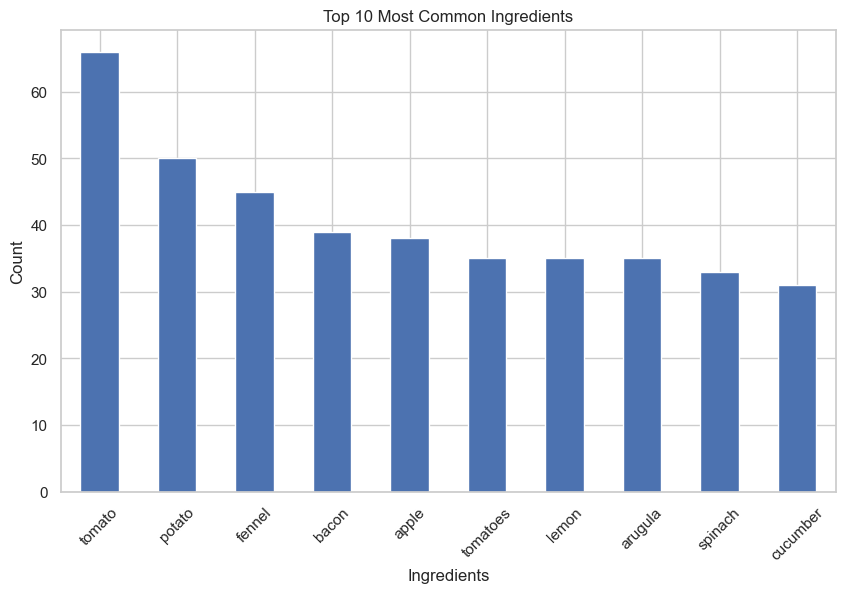

In [57]:
# Split ingredients and count them
ingredient_counts = df_new['title'].str.split(',').explode().str.strip().value_counts().head(10)

# Bar plot 
plt.figure(figsize=(10, 6))
ingredient_counts.plot(kind='bar')
plt.title('Top 10 Most Common Ingredients')
plt.xlabel('Ingredients')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


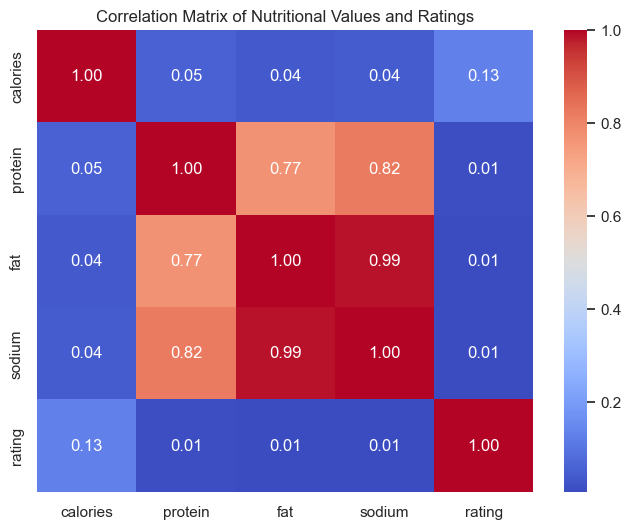

In [59]:
#Correlation Between Nutritional Values and Ratings

# Calculate correlation matrix
correlation_matrix = df_new[['calories', 'protein', 'fat', 'sodium', 'rating']].corr()

# Display correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Nutritional Values and Ratings')
plt.show()



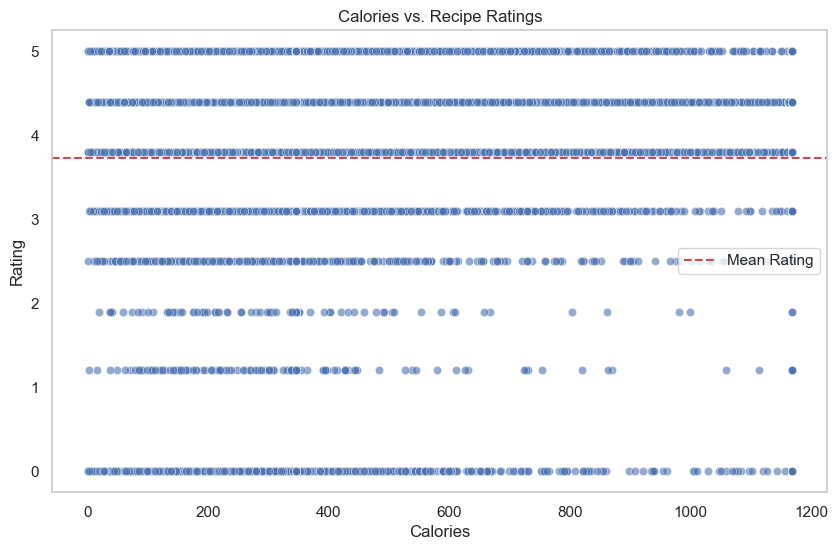

In [61]:
# Scatter plot for calories vs. ratings

plt.figure(figsize=(10, 6))
sns.scatterplot(x='calories', y='rating', data=df_new, alpha=0.6)
plt.title('Calories vs. Recipe Ratings')
plt.xlabel('Calories')
plt.ylabel('Rating')
plt.axhline(y=df_new['rating'].mean(), color='r', linestyle='--', label='Mean Rating')
plt.legend()
plt.grid()
plt.show()

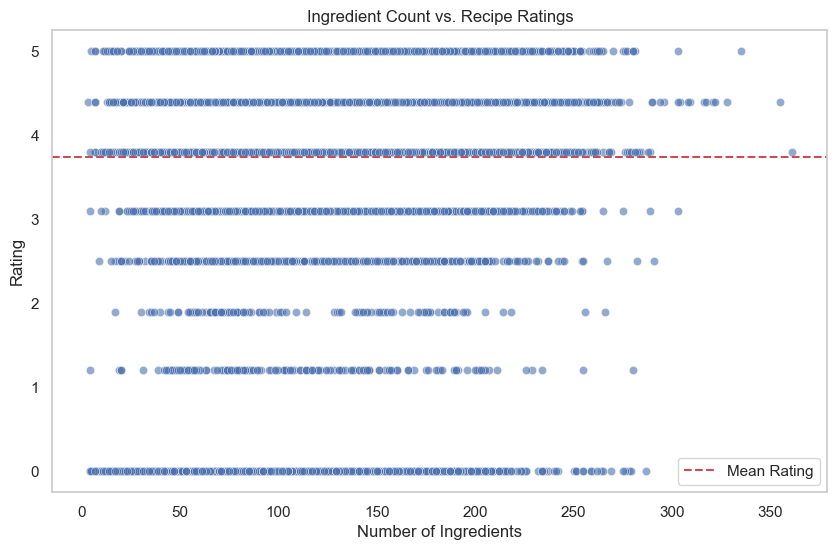

In [63]:
# Ingredient Count vs. Ratings

# Create a column for ingredient count
df_new['ingredient_count'] = df_new['ingredients_list'].apply(lambda x: len(x))

plt.figure(figsize=(10, 6))
sns.scatterplot(x='ingredient_count', y='rating', data=df_new, alpha=0.6)
plt.title('Ingredient Count vs. Recipe Ratings')
plt.xlabel('Number of Ingredients')
plt.ylabel('Rating')
plt.axhline(y=df_new['rating'].mean(), color='r', linestyle='--', label='Mean Rating')
plt.legend()
plt.grid()
plt.show()